In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load movie info from u.item
movies = pd.read_csv(
    r"data/ml-100k/u.item",  # original dataset file
    sep='|',
    header=None,
    encoding='latin-1'
)

# Assign proper column names
movies.columns = [
    'movieId', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime',
    'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
    'Romance','Sci-Fi','Thriller','War','Western'
]

# Drop unnecessary column
movies.drop(columns=['video_release_date'], inplace=True)

# Optional: fill missing values
movies['release_date'] = movies['release_date'].fillna('unknown')
movies['IMDb_URL'] = movies['IMDb_URL'].fillna('unknown')

# Load top 10 recommendations for user 1
top_10_user1 = pd.read_csv("ml/top_10_recommendations_user1.csv")

# Preview
print(movies.head())
print(top_10_user1.head())


   movieId              title release_date  \
0        1   Toy Story (1995)  01-Jan-1995   
1        2   GoldenEye (1995)  01-Jan-1995   
2        3  Four Rooms (1995)  01-Jan-1995   
3        4  Get Shorty (1995)  01-Jan-1995   
4        5     Copycat (1995)  01-Jan-1995   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  Comedy  ...  Fantasy  Film-Noir  Horror  \
0          0          1           1       1  ...        0          0       0   
1          1          0           0       0  ...        0          0       0   
2          0          0           0       0 

In [21]:
# Strip any leading/trailing spaces from column names
movies.columns = movies.columns.str.strip()

# Check the columns again
print(movies.columns)


Index(['movieId', 'title', 'release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [38]:
import pandas as pd

# Load top 10 recommendations for user 1
top_10_user1 = pd.read_csv("ml/top_10_recommendations_user1.csv")

# Load u.item and define column names
movies = pd.read_csv(
    "C:/Users/afsha/Desktop/proj/MovieRecommender/ml/data/ml-100k/u.item",
    sep='|',
    encoding='latin-1',
    header=None,
    names=['movieId', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
           'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
           'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
           'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
)

# Keep only relevant columns
movies = movies[['movieId', 'title']]

# Merge top 10 recommendations with movie titles
top_10_with_titles = pd.merge(
    top_10_user1,
    movies,
    on='movieId',
    how='left'
)

# Check what columns exist after merge
print("Columns after merge:", top_10_with_titles.columns)

# If 'title_y' exists, rename it to 'title'
if 'title_y' in top_10_with_titles.columns:
    top_10_with_titles.rename(columns={'title_y': 'title'}, inplace=True)

# Display top 10 movies with titles
print("Top 10 recommended movies for user 1 with titles:")
print(top_10_with_titles[['movieId', 'title', 'predicted_rating']])


Columns after merge: Index(['movieId', 'title_x', 'predicted_rating', 'title_y'], dtype='object')
Top 10 recommended movies for user 1 with titles:
   movieId                                   title  predicted_rating
0       50                        Star Wars (1977)          0.564475
1      174          Raiders of the Lost Ark (1981)          0.392052
2      127                   Godfather, The (1972)          0.387986
3      172         Empire Strikes Back, The (1980)          0.348122
4       12              Usual Suspects, The (1995)          0.331018
5      173              Princess Bride, The (1987)          0.325199
6      100                            Fargo (1996)          0.311497
7      168  Monty Python and the Holy Grail (1974)          0.295959
8       98        Silence of the Lambs, The (1991)          0.289811
9       56                     Pulp Fiction (1994)          0.286030


In [39]:
# Display top 10 movies in a clean table
print("Top 10 recommended movies for user 1:\n")
print(top_10_with_titles[['movieId', 'title', 'predicted_rating']].to_string(index=False))

Top 10 recommended movies for user 1:

 movieId                                  title  predicted_rating
      50                       Star Wars (1977)          0.564475
     174         Raiders of the Lost Ark (1981)          0.392052
     127                  Godfather, The (1972)          0.387986
     172        Empire Strikes Back, The (1980)          0.348122
      12             Usual Suspects, The (1995)          0.331018
     173             Princess Bride, The (1987)          0.325199
     100                           Fargo (1996)          0.311497
     168 Monty Python and the Holy Grail (1974)          0.295959
      98       Silence of the Lambs, The (1991)          0.289811
      56                    Pulp Fiction (1994)          0.286030


In [40]:
# Save to CSV
top_10_with_titles[['movieId', 'title', 'predicted_rating']].to_csv(
    "ml/top_10_recommendations_user1_with_titles.csv",
    index=False
)

print("Top 10 recommendations saved to 'top_10_recommendations_user1_with_titles.csv'.")

Top 10 recommendations saved to 'top_10_recommendations_user1_with_titles.csv'.


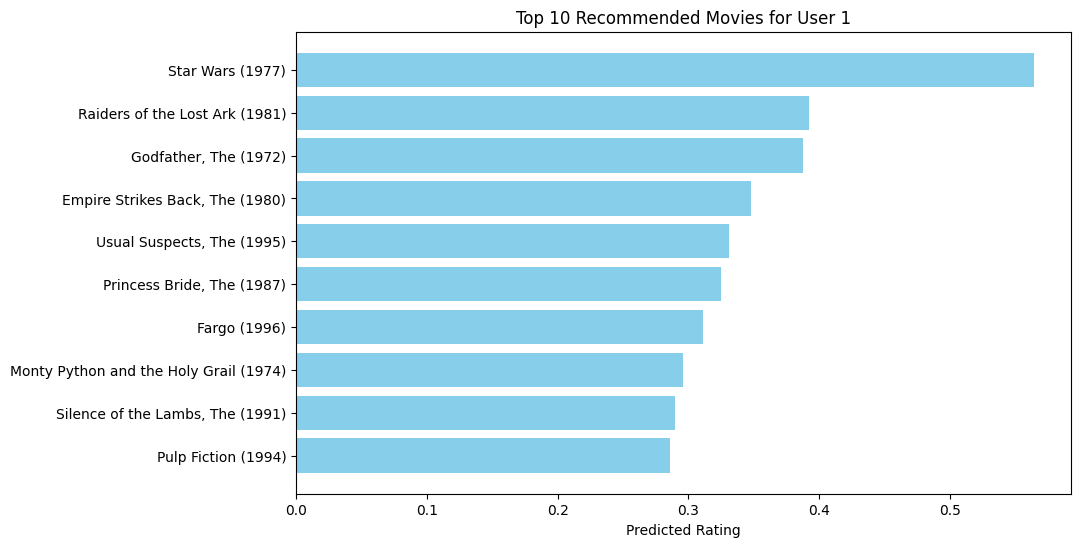

In [41]:
import matplotlib.pyplot as plt

# Bar plot of predicted ratings
plt.figure(figsize=(10,6))
plt.barh(top_10_with_titles['title'], top_10_with_titles['predicted_rating'], color='skyblue')
plt.xlabel('Predicted Rating')
plt.title('Top 10 Recommended Movies for User 1')
plt.gca().invert_yaxis()  # Highest rating on top
plt.show()



In [47]:
# Step 5: Optional - top 10 movies for user 1
user1_top10 = pred_ratings_df.loc[1].sort_values(ascending=False).head(10)
user1_top10_df = user1_top10.reset_index().rename(columns={'index':'movieId', 1:'predicted_rating'})

# Merge with movie titles
user1_top10_with_titles = pd.merge(user1_top10_df, movies[['movieId','title']], on='movieId', how='left')

# Print top 10 predicted movies for User 1
print("Top 10 predicted movies for User 1:")
print(user1_top10_with_titles[['movieId','title','predicted_rating']])


Top 10 predicted movies for User 1:
   movieId                             title  predicted_rating
0       50                  Star Wars (1977)          2.694592
1      100                      Fargo (1996)          2.238600
2      181         Return of the Jedi (1983)          2.154825
3      258                    Contact (1997)          2.053022
4      174    Raiders of the Lost Ark (1981)          1.893955
5      127             Godfather, The (1972)          1.875928
6      286       English Patient, The (1996)          1.865323
7        1                  Toy Story (1995)          1.858961
8       98  Silence of the Lambs, The (1991)          1.774125
9      288                     Scream (1996)          1.744433


In [48]:
def get_top_n_recommendations(user_id, n=10):
    # Get user's predicted ratings
    user_top = pred_ratings_df.loc[user_id].sort_values(ascending=False).head(n)
    
    # Convert to DataFrame
    user_top_df = user_top.reset_index().rename(columns={'index':'movieId', user_id:'predicted_rating'})
    
    # Merge with movie titles
    user_top_with_titles = pd.merge(user_top_df, movies[['movieId','title']], on='movieId', how='left')
    
    return user_top_with_titles[['movieId','title','predicted_rating']]

# Example: Top 10 movies for User 1
print(get_top_n_recommendations(1, 10))


   movieId                             title  predicted_rating
0       50                  Star Wars (1977)          2.694592
1      100                      Fargo (1996)          2.238600
2      181         Return of the Jedi (1983)          2.154825
3      258                    Contact (1997)          2.053022
4      174    Raiders of the Lost Ark (1981)          1.893955
5      127             Godfather, The (1972)          1.875928
6      286       English Patient, The (1996)          1.865323
7        1                  Toy Story (1995)          1.858961
8       98  Silence of the Lambs, The (1991)          1.774125
9      288                     Scream (1996)          1.744433


In [49]:
top_recs_all_users = pd.DataFrame()

for user in pred_ratings_df.index:
    top_n_df = get_top_n_recommendations(user, n=10)
    top_n_df['userId'] = user
    top_recs_all_users = pd.concat([top_recs_all_users, top_n_df])

# Save to CSV
top_recs_all_users.to_csv("ml/top_10_recommendations_all_users.csv", index=False)
print("Top 10 recommendations for all users saved!")


Top 10 recommendations for all users saved!


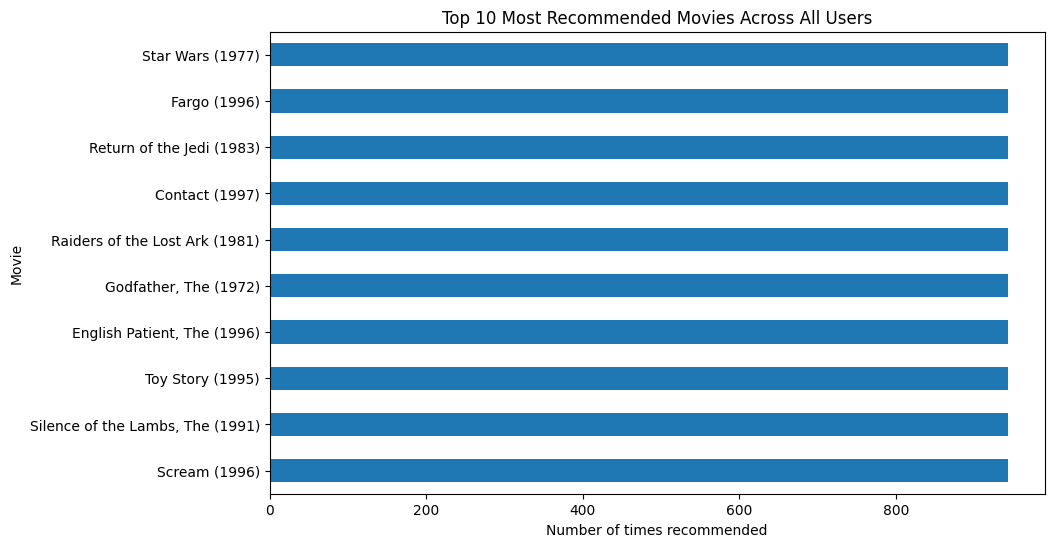

In [50]:
import matplotlib.pyplot as plt

# Count how many times each movie appears in top recommendations
movie_counts = top_recs_all_users['title'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
movie_counts.plot(kind='barh')
plt.xlabel("Number of times recommended")
plt.ylabel("Movie")
plt.title("Top 10 Most Recommended Movies Across All Users")
plt.gca().invert_yaxis()
plt.show()
